Number of features in the dataset: 64
Original dataset accuracy: 0.9689
Training time: 0.2410 seconds
Number of features after reduction: 53
Reduced dataset accuracy: 0.9667
Training time: 0.1730 seconds
First principal component explains 14.65% of the variance
Second principal component explains 13.78% of the variance


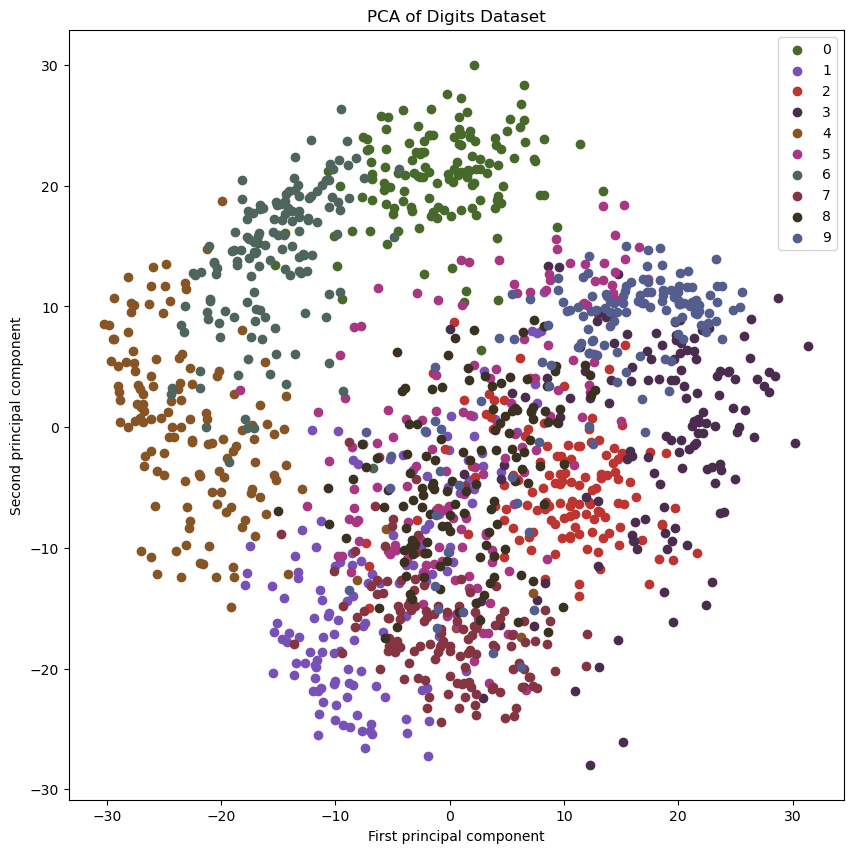

PCA-reduced (2 components) dataset accuracy: 0.6222
Training time: 0.1980 seconds


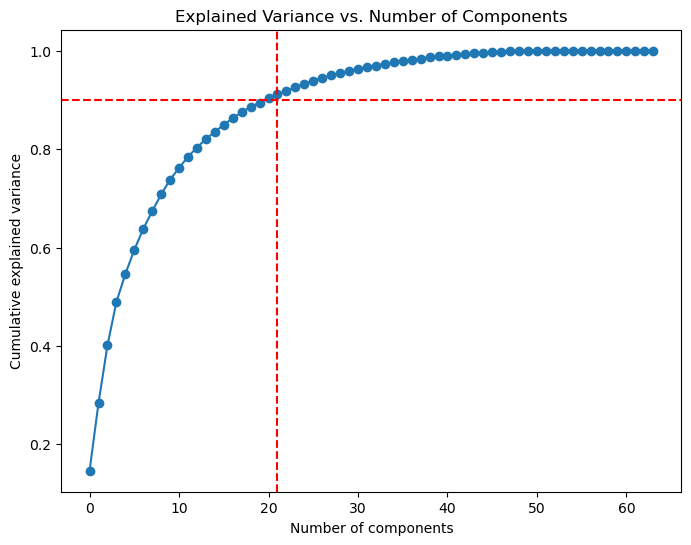

Number of components to retain 90% variance: 21
PCA-reduced (21 components) dataset accuracy: 0.9711
Training time: 0.3360 seconds


In [6]:
import time
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.decomposition import PCA
from sklearn.metrics import accuracy_score

# task1 -------------------------
digits = load_digits()
X, y = digits.data, digits.target
n_features = X.shape[1] 
print(f"Number of features in the dataset: {n_features}")
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

# task2 -------------------------
rf = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
start_time = time.time()
rf.fit(X_train, y_train)
original_accuracy = rf.score(X_test, y_test)
original_time = time.time() - start_time

print(f"Original dataset accuracy: {original_accuracy:.4f}")
print(f"Training time: {original_time:.4f} seconds")

# task3 -- Selector used to reduce features with variance lower than 0.16
selector = VarianceThreshold(threshold=(.8 * (1 - .8)))
X_train_reduced = selector.fit_transform(X_train)
X_test_reduced = selector.transform(X_test)
n_features_reduced = X_train_reduced.shape[1]  
print(f"Number of features after reduction: {n_features_reduced}")

# task4 -----------------------------
rf_reduced = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
start_time = time.time()
rf_reduced.fit(X_train_reduced, y_train)
reduced_accuracy = rf_reduced.score(X_test_reduced, y_test)
reduced_time = time.time() - start_time

print(f"Reduced dataset accuracy: {reduced_accuracy:.4f}")
print(f"Training time: {reduced_time:.4f} seconds")

# task5 ----------------------------
pca = PCA(n_components=2)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

explained_variance = pca.explained_variance_ratio_
print(f"First PC contains {explained_variance[0]:.2%} of the variance")
print(f"Second PC contains {explained_variance[1]:.2%} of the variance")

# task6 ---------------------------------
plt.figure(figsize=(10, 10))
colors = ["#476A2A", "#7851B8", "#BD3430", "#4A2D4E", "#875525", "#A83683", "#4E655E", "#853541", "#3A3120", "#535D8E"]
for i in range(len(np.unique(y_train))):
    plt.scatter(X_train_pca[y_train == i, 0], X_train_pca[y_train == i, 1], color=colors[i], label=str(i))
plt.xlabel("First principal component")
plt.ylabel("Second principal component")
plt.title("PCA of Digits Dataset")
plt.legend()
plt.show()

# task7 ---------------------------------
rf_pca = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
start_time = time.time()
rf_pca.fit(X_train_pca, y_train)
pca_accuracy = rf_pca.score(X_test_pca, y_test)
pca_time = time.time() - start_time

print(f"PCA-reduced (2 components) dataset accuracy: {pca_accuracy:.4f}")
print(f"Training time: {pca_time:.4f} seconds")

# task8 ---------------------------------
pca_full = PCA().fit(X_train)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)
num_components_90 = np.argmax(cumulative_variance >= 0.90) + 1

plt.figure(figsize=(8, 6))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.90, color='r', linestyle='--')
plt.axvline(x=num_components_90, color='r', linestyle='--')
plt.xlabel('Number of components')
plt.ylabel('Cumulative explained variance')
plt.title('Explained Variance vs. Number of Components')
plt.show()

print(f"Number of components to retain 90% variance: {num_components_90}")

# task9 ---------------------------------
pca_90 = PCA(n_components=num_components_90)
X_train_pca_90 = pca_90.fit_transform(X_train)
X_test_pca_90 = pca_90.transform(X_test)

rf_pca_90 = RandomForestClassifier(n_estimators=50, max_depth=10, random_state=42)
start_time = time.time()
rf_pca_90.fit(X_train_pca_90, y_train)
pca_90_accuracy = rf_pca_90.score(X_test_pca_90, y_test)
pca_90_time = time.time() - start_time

print(f"PCA-reduced ({num_components_90} components) dataset accuracy: {pca_90_accuracy:.4f}")
print(f"Training time: {pca_90_time:.4f} seconds")
